## Health Claim Amounts and the GB Family of Distributions

### Part A

In [372]:
import csv
import statistics

claims = []
with open('data/clms.txt', newline='') as inputfile:
    for row in inputfile:
        claims.append(float(row.strip()))

mean = sum(claims)/len(claims)
print("Mean = " + str(mean))
median = statistics.median(claims)
print("Median = " + str(median))
maximum = max(claims)
print("Maximum = " + str(maximum))
minimum = min(claims)
print("Minimum = " + str(minimum))
stdev = statistics.stdev(claims)
print("Standard deviation = " + str(stdev))

variance = statistics.variance(claims)


Mean = 720.2779753272415
Median = 172.21
Maximum = 227967.25
Minimum = 0.01
Standard deviation = 3972.850824119446


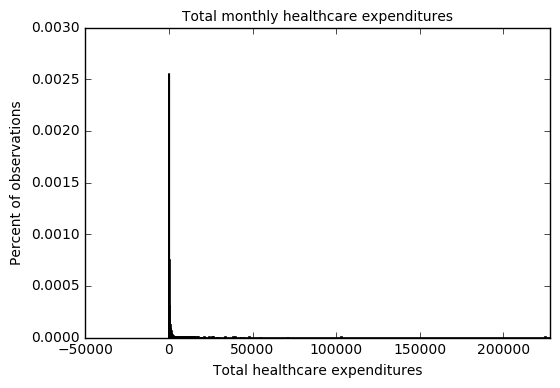

In [373]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(claims, 1000, normed=True, edgecolor='black', linewidth=1.2)
plt.title('Total monthly healthcare expenditures', fontsize=10)
plt.xlabel('Total healthcare expenditures')
plt.ylabel('Percent of observations')
plt.xlim([-50000, 228000]) 
plt.show()

In [374]:
length1 = len(claims)
print(length1)
claims2 = [s for s in claims if s <= 800]
length2 = len(claims2)
print(length2)

10619
9020


0.849420849421


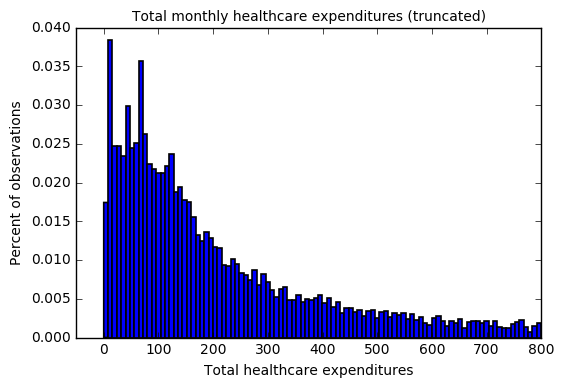

In [375]:
import numpy as np
weights = (1/length1)*np.ones_like(claims2)
count, bins, ignored = plt.hist(claims2, 100, weights=weights, edgecolor='black', linewidth=1.2)
print(np.sum(count))
plt.title('Total monthly healthcare expenditures (truncated)', fontsize=10)
plt.xlabel('Total healthcare expenditures')
plt.ylabel('Percent of observations')
plt.xlim([-50, 800]) 
plt.show()

In this case, although the second graph excludes some of the data, it is still preferable because it includes most of the observations and visibly illustrates the pattern for the majority of the data.

## Part B: Gamma Distribution MLE

In [376]:
import scipy.stats as sts
import math

def gamma_pdf(xvals, alpha, beta):
    gamma = math.gamma(alpha)
    d = gamma*(beta**alpha)
    B = xvals**(alpha-1)
    C = np.exp(np.multiply(-1,xvals)/beta)
    pdf_vals = B*C/d
    return pdf_vals

In [377]:
def log_lik_gamma(xvals, alpha, beta):
    pdf_vals = gamma_pdf(xvals, alpha, beta)
    pdf_vals[pdf_vals==0] = 1e-12
    ln_pdf_vals = np.log(pdf_vals ,where=(pdf_vals > 0))
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

In [378]:
def crit(params, *args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [379]:
import scipy.optimize as opt
beta_init = (variance)/mean 
alpha_init = mean/beta_init
params_init = np.array([alpha_init, beta_init])
claims = np.array(claims)
mle_args = (claims)
bounds = ((1e-8, None),(1e-8,None))
results = opt.minimize(crit, params_init, args=mle_args,method='L-BFGS-B',bounds=bounds)
alpha_MLE, beta_MLE = results.x
print('alpha_MLE=', alpha_MLE, 'beta_MLE=', beta_MLE)
print("")
print(results)

alpha_MLE= 0.221750953314 beta_MLE= 21913.1282767

      fun: 82076.640496455686
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.        ,  0.09167707])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([  2.21750953e-01,   2.19131283e+04])


/Users/Geoff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in power


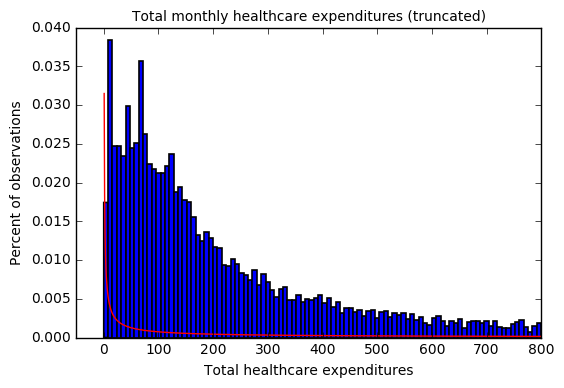

In [380]:
x_vals = np.linspace(0, 800, 1000)
y_vals = gamma_pdf(x_vals, alpha_MLE, beta_MLE)
plt.plot(x_vals, y_vals, color='r')
weights = (1/length1)*np.ones_like(claims2)
count, bins, ignored = plt.hist(claims2, 100, weights=weights,edgecolor='black', linewidth=1.2)
plt.title('Total monthly healthcare expenditures (truncated)', fontsize=10)
plt.xlabel('Total healthcare expenditures')
plt.ylabel('Percent of observations')
plt.xlim([-50, 800]) 
plt.show()

## Part C: Generalized Gamma MLE

In [387]:
def gen_gamma_pdf(xvals, alpha, beta, m):
    gamma = math.gamma(alpha/m)
    d = gamma*(beta**alpha)
    B = m*xvals**(alpha-1)
    C = np.exp(-1*(xvals/beta)**m)
    pdf_vals = B*C/d
    return pdf_vals

def log_lik_gen_gamma(xvals, alpha, beta, m):
    pdf_vals = gen_gamma_pdf(xvals, alpha, beta, m)
    pdf_vals[pdf_vals==0] = 1e-12
    ln_pdf_vals = np.log(pdf_vals ,where=(pdf_vals > 0))
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit(params, *args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gen_gamma(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

import scipy.optimize as opt
beta_init = beta_MLE
alpha_init = alpha_MLE
m_init = 1
params_init = np.array([alpha_init, beta_init, m_init])
claims = np.array(claims)
mle_args = (claims)
bounds = ((1e-8, None),(1e-8,None),(1e-8,None))
results = opt.minimize(crit, params_init, args=mle_args,method='L-BFGS-B',bounds=bounds)
alpha_MLE_2, beta_MLE_2, m_MLE_2 = results.x
print('alpha_MLE_2= ', alpha_MLE_2, 'beta_MLE_2= ', beta_MLE_2, 'm_MLE_2= ', m_MLE_2)
print("")
print(results)

alpha_MLE_2=  0.221733190627 beta_MLE_2=  21913.1280035 m_MLE_2=  0.997074563064

      fun: 82076.635624632108
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.66562745,  0.09167707, -1.05064828])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 2
   status: 0
  success: True
        x: array([  2.21733191e-01,   2.19131280e+04,   9.97074563e-01])


/Users/Geoff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in power


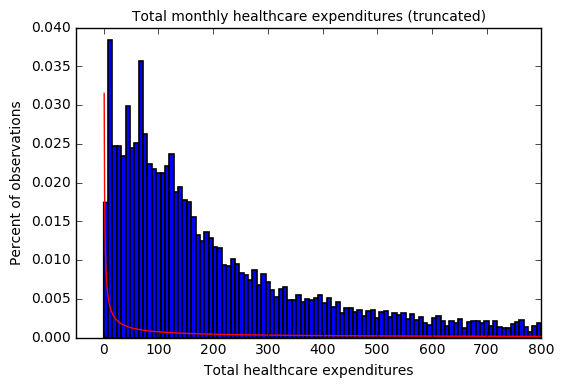

In [388]:
x_vals = np.linspace(0, 800, 1000)
y_vals = gen_gamma_pdf(x_vals, alpha_MLE_2, beta_MLE_2, m_MLE_2)
plt.plot(x_vals, y_vals, color='r')
weights = (1/length1)*np.ones_like(claims2)
count, bins, ignored = plt.hist(claims2, 100, weights=weights,edgecolor='black', linewidth=1.2)
plt.title('Total monthly healthcare expenditures (truncated)', fontsize=10)
plt.xlabel('Total healthcare expenditures')
plt.ylabel('Percent of observations')
plt.xlim([-50, 800]) 
plt.show()

## Part D: Generalized Beta 2

In [393]:
import scipy.special as sp

def gen_beta_pdf(xvals, a, b, p, q):
    beta = sp.beta(p,q)
    num = a*xvals**(a*p-1)
    denom = (b**(a*p))*beta*(1+(xvals/b)**a)**(p+q)
    return num/denom

def log_lik_gen_beta(xvals, a, b, p, q):
    pdf_vals = gen_beta_pdf(xvals, a, b, p, q)
    pdf_vals[pdf_vals==0] = 1e-12
    ln_pdf_vals = np.log(pdf_vals ,where=(pdf_vals > 0))
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit(params, *args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_gen_beta(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

import scipy.optimize as opt
a_init = m_MLE_2
p_init = alpha_MLE_2/m_MLE_2
q_init = 10000
b_init = (q_init**(1/m_MLE_2))*beta_MLE_2
params_init = np.array([a_init, b_init, p_init, q_init])
claims = np.array(claims)
mle_args = (claims)
bounds = ((1e-8, None),(1e-8,None),(1e-8,None),(1e-8,None))
results = opt.minimize(crit, params_init, args=mle_args,method='L-BFGS-B',bounds=bounds)
a_MLE, b_MLE, p_MLE, q_MLE = results.x
print('a_MLE= ', a_MLE, 'b_MLE= ',b_MLE, 'p_MLE= ',p_MLE, 'q_MLE= ',q_MLE)
print("")
print(results)

/Users/Geoff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in power


a_MLE=  0.699104541193 b_MLE=  225133672.857 p_MLE=  0.996139781097 q_MLE=  9999.99525752

      fun: 76459.945003891509
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-41.36672942,   0.        ,  18.01672624,  16.55134838])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 155
      nit: 14
   status: 0
  success: True
        x: array([  6.99104541e-01,   2.25133673e+08,   9.96139781e-01,
         9.99999526e+03])


/Users/Geoff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in power


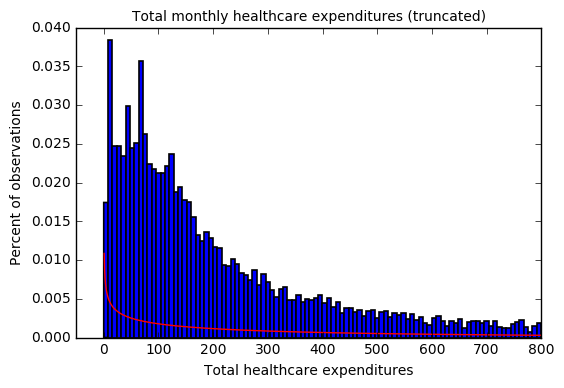

In [394]:
x_vals = np.linspace(0, 800, 1000)
y_vals = gen_beta_pdf(x_vals, a_MLE, b_MLE, p_MLE, q_MLE)
plt.plot(x_vals, y_vals, color='r')
weights = (1/length1)*np.ones_like(claims2)
count, bins, ignored = plt.hist(claims2, 100, weights=weights,edgecolor='black', linewidth=1.2)
plt.title('Total monthly healthcare expenditures (truncated)', fontsize=10)
plt.xlabel('Total healthcare expenditures')
plt.ylabel('Percent of observations')
plt.xlim([-50, 800]) 
plt.show()

## Part E: Likelihood Ratio Test

In [407]:
LogLike1 = log_lik_gamma(claims,alpha_MLE,beta_MLE)
LogLike2 = log_lik_gen_gamma(claims,alpha_MLE_2,beta_MLE_2,m_MLE_2)
LogLike3 = log_lik_gen_beta(claims,a_MLE,b_MLE,p_MLE,q_MLE)

df = 4

LR1 = 2 * (LogLike3 - LogLike1)
pval_h0 = 1.0 - sts.chi2.cdf(LR1, df)
print('chi squared of gamma given generalized beta (4 df) = ', pval_h0)

LR2 = 2 * (LogLike3 - LogLike2)
pval_h0 = 1.0 - sts.chi2.cdf(LR2, df)
print('chi squared of generalized gamma given generalized beta (4 df) = ', pval_h0)

chi squared of gamma given generalized beta (4 df) =  0.0
chi squared of generalized gamma given generalized beta (4 df) =  0.0


## Part F

In [400]:
from scipy import integrate

#Generalized Beta Distribution
pdf = lambda x: gen_beta_pdf(x, a_MLE, b_MLE, p_MLE, q_MLE)
prob1 = integrate.quad(pdf,1000,np.inf)
print(prob1[0])

0.1624207742226825


In [402]:
#Gamma Distribution
pdf2 = lambda x: gamma_pdf(x, alpha_MLE, beta_MLE)
prob2 = integrate.quad(pdf2,1000,np.inf)
print(prob2[0])

0.4519639310268087


The probability of having a claim over $1000 is almost three times larger when we use the gamma distribution to estimate the event.